# Sigmoid Function

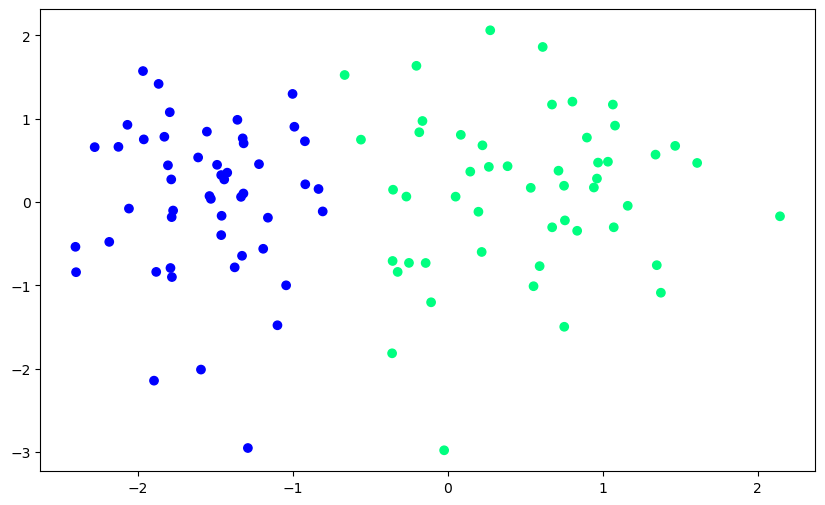

In [12]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter')

In [16]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
    
def perceptron(x, y):
    new_x = np.insert(x, 0, 1, axis=1)
    weights = np.ones(new_x.shape[1])
    lr = 0.1
    epochs = 1000
    for i in range(epochs):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(new_x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*new_x[j]
    return weights[0], weights[1:]

intercept_, coef_ = perceptron(x, y)

In [18]:
print(intercept_)
print(coef_)

2.727145749754502
[ 4.4328862  -0.09122427]


(-3.0, 2.0)

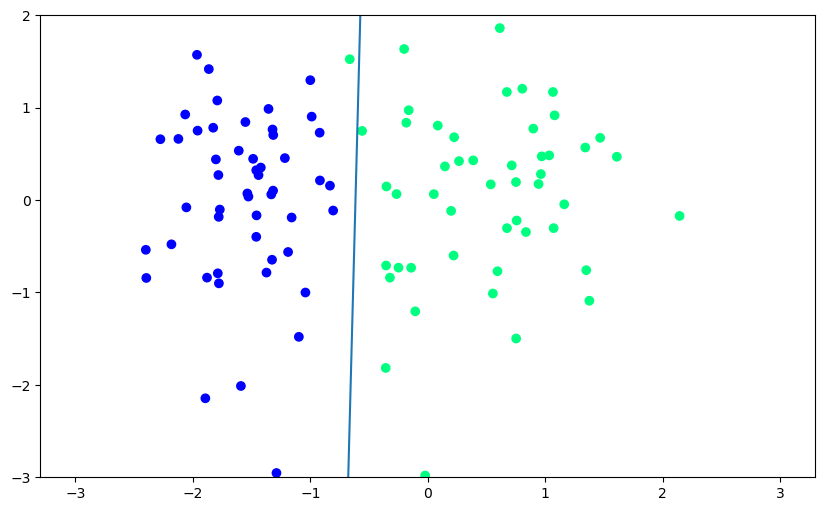

In [20]:
# ax + by + c = 0
# y = -a/b x - c/b
c = -intercept_/coef_[1]
m = -coef_[0]/coef_[1]
x_in = np.linspace(-3, 3, 100)
y_in = m*x_in + c
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter')
plt.plot(x_in, y_in)
plt.ylim(-3, 2)

# Logistic Regression 

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x, y)
intercept_ = lr.intercept_
coef_ = lr.coef_
print(intercept_)
print(coef_)

[2.25106636]
[[3.50144121 0.02773483]]


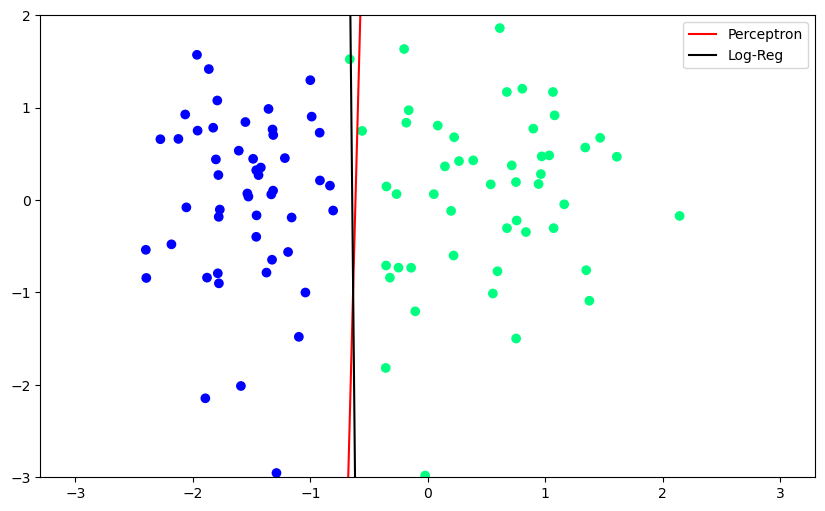

In [25]:
c = -intercept_/coef_[0][1]
m = -coef_[0][0]/coef_[0][1]
x_in_new = np.linspace(-3, 3, 100)
y_in_new = m*x_in_new + c
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter')
plt.plot(x_in, y_in, color='red', label='Perceptron')
plt.plot(x_in_new, y_in_new, color='black', label='Log-Reg')
plt.ylim(-3, 2)
plt.legend()
plt.show()